# Predict the loan amount to be sanctioned to a member




The Data file contains complete loan data for all loans issued through the 2007-2011, including the current loan status (Current, Charged-off, Fully Paid, etc.) and the payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.

#### Abstract

To predict the loan amount to be sanctioned by any lending organization to a member based on the member's previous public and private loan history.

- I plan to use three different regression models; Decision Tree Regression, and Random Forest Regression. Based on those models I plan to predict the loan amount to be sanctioned for future loans. 

### Dependencies

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing Data 

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swinalmeida","key":"218bd8814acdcea875d9314eca58081b"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imsparsh/lending-club-loan-dataset-2007-2011

100% 8.39M/8.39M [00:00<00:00, 16.1MB/s]



In [ ]:
!mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
!unzip lending-club-loan-dataset-2007-2011.zip -d train

Archive:  lending-club-loan-dataset-2007-2011.zip
  inflating: train/Data_Dictionary.xlsx  
  inflating: train/loan.csv          


In [ ]:
data = pd.read_csv('train/loan.csv')

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.0000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Analyzing Data

In [ ]:
data.corr()['loan_amnt'][1:40].sort_values()

pub_rec                       -0.051236
delinq_2yrs                   -0.031864
mths_since_last_record         0.004968
inq_last_6mths                 0.009229
mths_since_last_delinq         0.014871
total_rec_late_fee             0.044706
dti                            0.066439
collection_recovery_fee        0.072853
recoveries                     0.135446
member_id                      0.140710
open_acc                       0.177168
out_prncp_inv                  0.192623
out_prncp                      0.192937
total_acc                      0.256442
annual_inc                     0.271149
revol_bal                      0.317597
last_pymnt_amnt                0.448742
total_rec_int                  0.729726
total_rec_prncp                0.852021
total_pymnt_inv                0.854243
total_pymnt                    0.886613
installment                    0.930288
funded_amnt_inv                0.940034
funded_amnt                    0.981578
loan_amnt                      1.000000


Selecting features to check correlation

In [ ]:
features = data[['pub_rec','delinq_2yrs',                  
'mths_since_last_record',                  
'inq_last_6mths',                      
'mths_since_last_delinq',                
'total_rec_late_fee',                     
'dti',                                      
'collection_recovery_fee',       
'recoveries',                    
'member_id',                     
'open_acc',                      
'out_prncp_inv',                 
'out_prncp',                     
'total_acc',                     
'annual_inc',                     
'revol_bal',                   
'last_pymnt_amnt',                
'total_rec_int' ,                
'total_rec_prncp',                
'total_pymnt_inv',               
'total_pymnt',                    
'installment','funded_amnt_inv','funded_amnt','loan_amnt']]

Plotting the correlation matrix

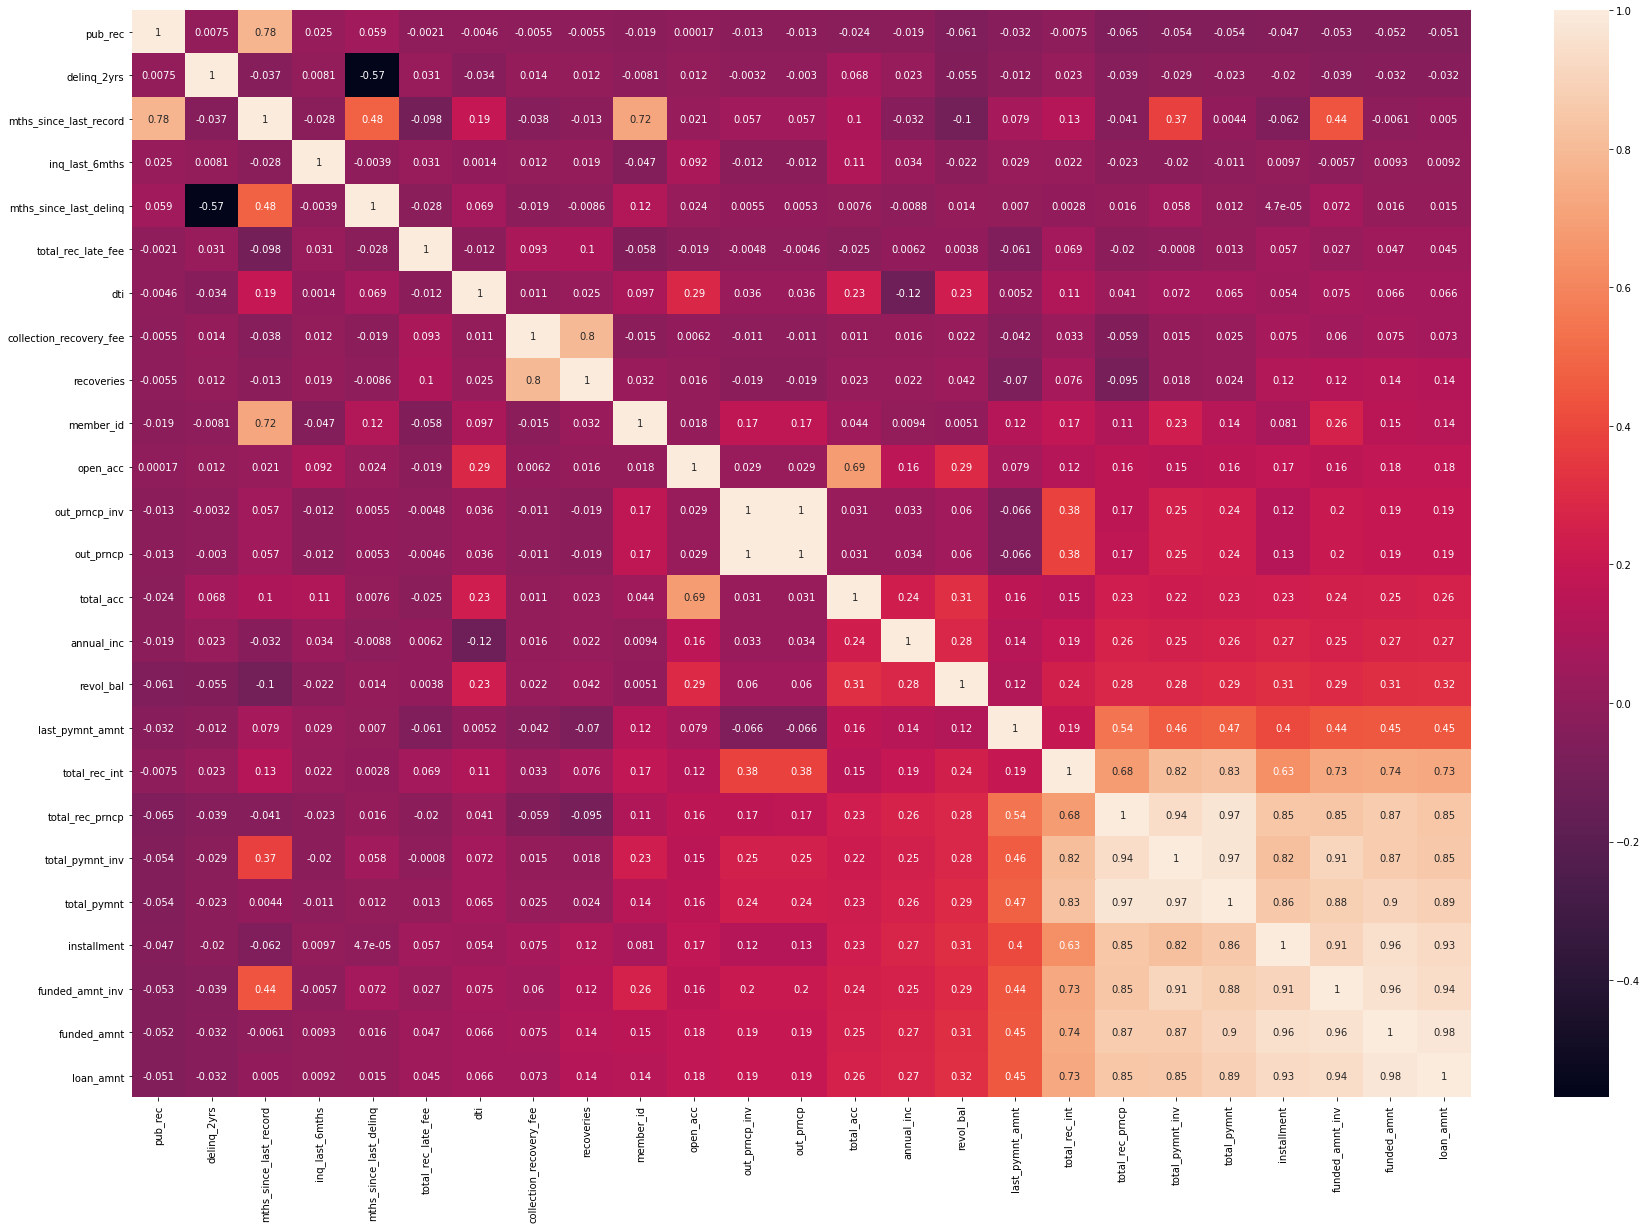

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(features.corr(),annot=True)

Selecting the final features

The co-relation matrix reveals that 'member_id', 'collection_recovery_fee','installment', 'delinq_2yrs', 'pub_rec', 'annual_inc', 'dti', 'open_acc', 'total_pymnt', 'revol_bal' are dependent variable and 'pub_rec', 'delinq_2yrs' are independent variables regarding the target variable Loan_amnt



In [ ]:
df = data[['member_id','loan_amnt','collection_recovery_fee','installment','delinq_2yrs','pub_rec',
            'annual_inc','dti','open_acc','total_pymnt','revol_bal']]

In [ ]:
df.head()

,member_id,loan_amnt,collection_recovery_fee,installment,delinq_2yrs,pub_rec,annual_inc,dti,open_acc,total_pymnt,revol_bal
0,1296599,5000,0.00,162.87,0,0,24000.0,27.65,3,5863.155187,13648
1,1314167,2500,1.11,59.83,0,0,30000.0,1.00,3,1008.710000,1687
2,1313524,2400,0.00,84.33,0,0,12252.0,8.72,2,3005.666844,2956
3,1277178,10000,0.00,339.31,0,0,49200.0,20.00,10,12231.890000,5598
4,1311748,3000,0.00,67.79,0,0,80000.0,17.94,15,3513.330000,27783


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   collection_recovery_fee  39717 non-null  float64
 3   installment              39717 non-null  float64
 4   delinq_2yrs              39717 non-null  int64  
 5   pub_rec                  39717 non-null  int64  
 6   annual_inc               39717 non-null  float64
 7   dti                      39717 non-null  float64
 8   open_acc                 39717 non-null  int64  
 9   total_pymnt              39717 non-null  float64
 10  revol_bal                39717 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 3.3 MB


Plotting the heatmap of the selected features

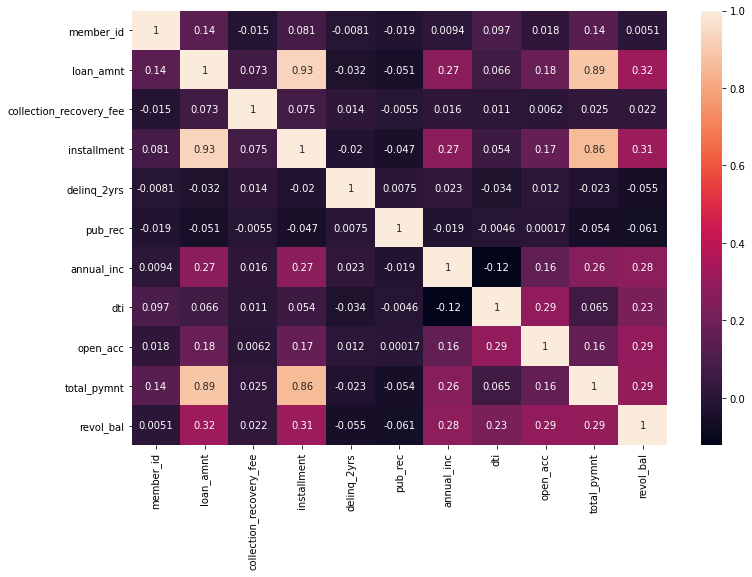

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Checking the ranges for the target variable 

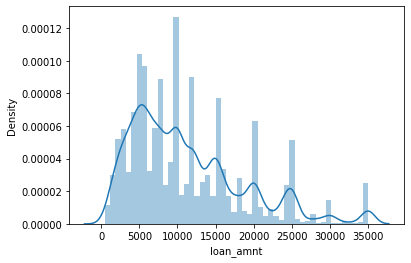

In [ ]:
sns.distplot(df['loan_amnt'],kde=True)

In [ ]:
df.corr()['loan_amnt'].sort_values()

pub_rec                   -0.051236
delinq_2yrs               -0.031864
dti                        0.066439
collection_recovery_fee    0.072853
member_id                  0.140710
open_acc                   0.177168
annual_inc                 0.271149
revol_bal                  0.317597
total_pymnt                0.886613
installment                0.930288
loan_amnt                  1.000000
Name: loan_amnt, dtype: float64

Selected Features Description
- installment -	The monthly payment owed by the borrower if the loan originates.
- loan_amnt -	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- total_pymnt	- Payments received to date for total amount funded
- revol_bal	- Total credit revolving balance
- annual_inc	- The self-reported annual income provided by the borrower during registration.
- open_acc -	The number of open credit lines in the borrower's credit file.
- member_id	- A unique LC assigned Id for the borrower member.
- collection_recovery_fee -	post charge off collection fee
- dti -	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs -	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- pub_rec -	Number of derogatory public records


Checking the codependency of collection_recovery_fee and the loan_amount 

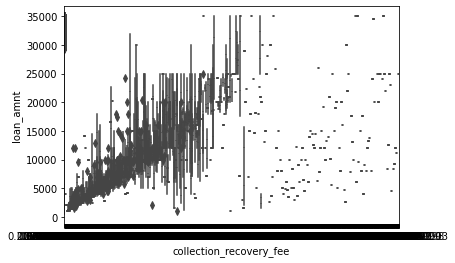

In [ ]:
sns.boxplot(x='collection_recovery_fee',y='loan_amnt',data=df)

Check the codependency of the final features with each other

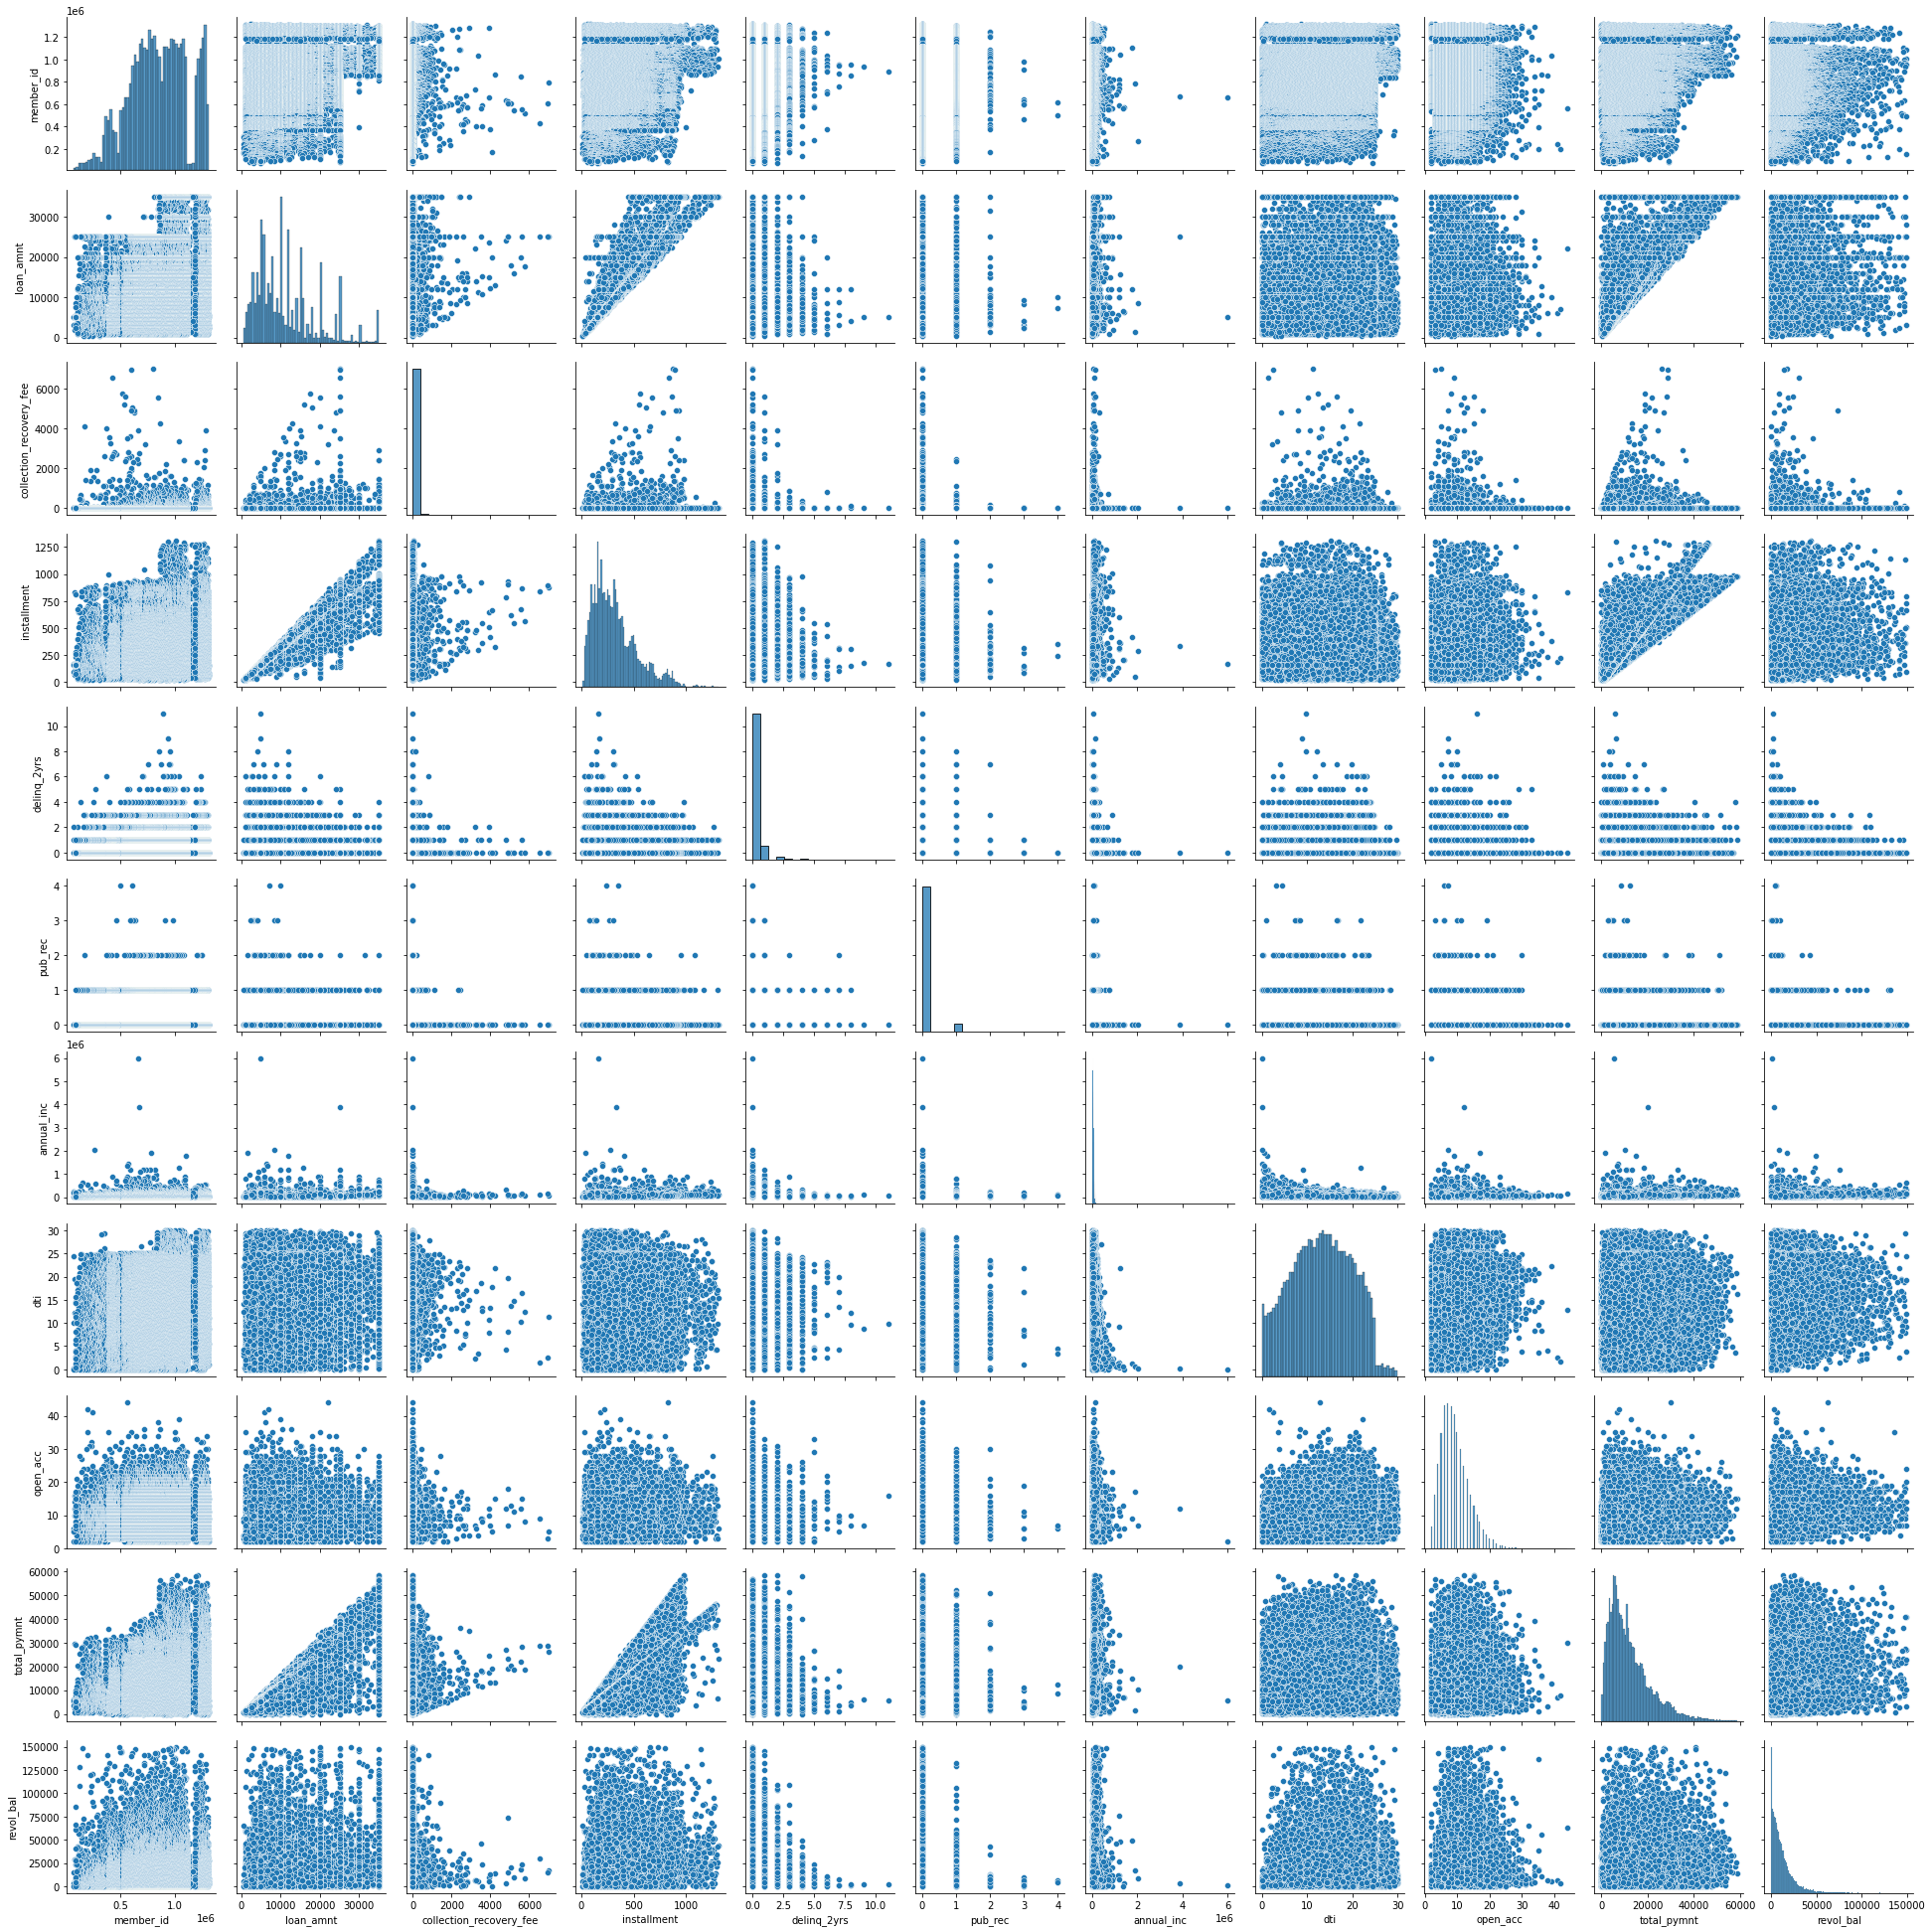

In [ ]:
sns.pairplot(df)

Checking for null values

In [ ]:
df.isnull().sum()

member_id                  0
loan_amnt                  0
collection_recovery_fee    0
installment                0
delinq_2yrs                0
pub_rec                    0
annual_inc                 0
dti                        0
open_acc                   0
total_pymnt                0
revol_bal                  0
dtype: int64

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
X = df.drop('loan_amnt',axis=1)[:10000]
y = df['loan_amnt'][:10000]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Decision Tree Regression

Training the model on default parameters

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor()
regressor2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predicting using default parameters

In [ ]:
y_pred_2 = regressor2.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,y_pred_2))
print(np.sqrt(mean_squared_error(y_test,y_pred_2)))
print(explained_variance_score(y_test,y_pred_2))

0.0
0.0
1.0


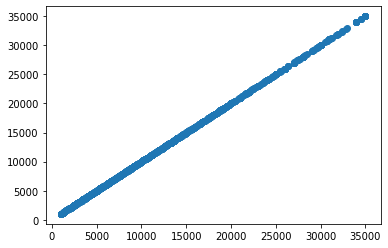

In [ ]:
plt.scatter(y_test,y_pred_2)

In [ ]:
param_dtr = [{'max_depth': np.arange(3, 10),
              'max_leaf_nodes':[1,10,25,50,100]}]

In [ ]:
dtr = DecisionTreeRegressor()
dtr_gs = GridSearchCV(dtr, param_dtr, cv=2, verbose=1).fit(X_train, y_train)

Fitting 2 folds for each of 35 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


In [ ]:
dtr_gs_results = pd.DataFrame(dtr_gs.cv_results_)
dtr_gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003120,0.001283,0.000000,0.000000,3,1,"{'max_depth': 3, 'max_leaf_nodes': 1}",NaN,NaN,NaN,NaN,35
1,0.008851,0.000024,0.001536,0.000053,3,10,"{'max_depth': 3, 'max_leaf_nodes': 10}",0.891329,0.910713,0.901021,0.009692,25
2,0.008772,0.000039,0.001485,0.000028,3,25,"{'max_depth': 3, 'max_leaf_nodes': 25}",0.891329,0.910713,0.901021,0.009692,25
3,0.009171,0.000394,0.001518,0.000028,3,50,"{'max_depth': 3, 'max_leaf_nodes': 50}",0.891329,0.910713,0.901021,0.009692,25
4,0.008880,0.000046,0.001485,0.000034,3,100,"{'max_depth': 3, 'max_leaf_nodes': 100}",0.891329,0.910713,0.901021,0.009692,25
5,0.001979,0.000083,0.000000,0.000000,4,1,"{'max_depth': 4, 'max_leaf_nodes': 1}",NaN,NaN,NaN,NaN,30
6,0.011275,0.000408,0.001551,0.000017,4,10,"{'max_depth': 4, 'max_leaf_nodes': 10}",0.901777,0.920998,0.911387,0.009610,19
7,0.010966,0.000026,0.001547,0.000001,4,25,"{'max_depth': 4, 'max_leaf_nodes': 25}",0.915212,0.934493,0.924852,0.009641,16
8,0.010962,0.000022,0.001533,0.000005,4,50,"{'max_depth': 4, 'max_leaf_nodes': 50}",0.915212,0.934493,0.924852,0.009641,16
9,0.011380,0.000399,0.001961,0.000221,4,100,"{'max_depth': 4, 'max_leaf_nodes': 100}",0.915212,0.934493,0.924852,0.009641,16


In [ ]:
print("Best Params", dtr_gs.best_params_)
print("Best Score", dtr_gs.best_score_)

Best Params {'max_depth': 6, 'max_leaf_nodes': 100}
Best Score 0.9393532634051676


Training and predicting the model using the Best parameters

In [ ]:
dtr_best = DecisionTreeRegressor(max_depth= 6, max_leaf_nodes= 100)
dtr_best.fit(X_train, y_train)
dtr_best.score(X_test, y_test)

0.9519942730242335

In [ ]:
y_pred_best_2 = dtr_best.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,y_pred_best_2))
print(np.sqrt(mean_squared_error(y_test,y_pred_best_2)))
print(explained_variance_score(y_test,y_pred_best_2))

1053.7970390865314
1858.0114127924232
0.9520052844350497


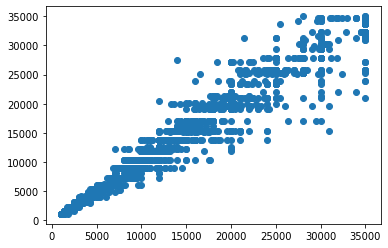

In [ ]:
plt.scatter(y_test,y_pred_best_2)

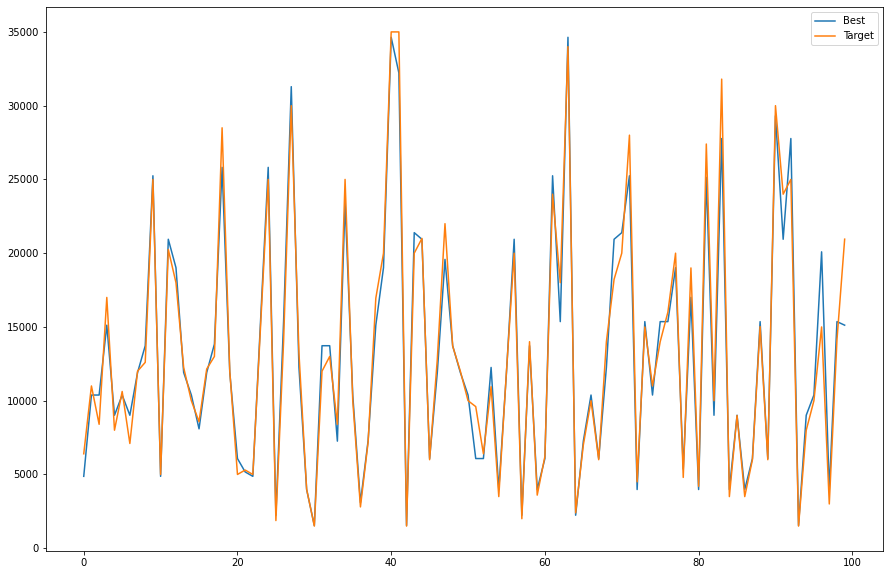

In [ ]:
# Comparison of Target value vs Predicted values
dtr_table = pd.DataFrame({'Predict_values':y_pred_best_2,'Actual_values':y_test})
fig= plt.figure(figsize=(15,10))
predicting_vs_actual_dtr = dtr_table.reset_index()
predicting_vs_actual_dtr = predicting_vs_actual_dtr.drop(['index'],axis=1)
plt.plot(predicting_vs_actual_dtr[:100])
plt.legend(('Best', 'Target'))

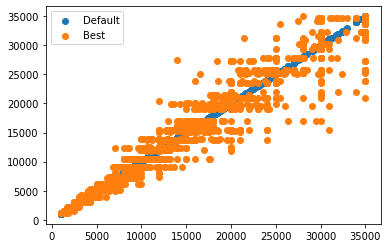

In [ ]:
# Comparison of Defualt vs Best Parameters Prediction values
plt.scatter(y_test,y_pred_2)
plt.scatter(y_test,y_pred_best_2)
plt.legend(('Default','Best'))

Question & Answers: 

- Is the relationship significant?

  Answer : Yes, the relationship is significant

- Are any model assumptions violated?

  Answer : No

- Is there any multicollinearity in the model?
  
  Answer: Yes, there is multicollinearity in our model.

- In the multivariate models are predictor variables independent of all the other predictor variables?

  Answer: No, almost all our features are codependant on each other.

- In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

  Answer: The most significant variable is *installment*

- Does the model make sense?

  Answer: Yes, the model makes sense. Since it helps us predict the loan amount.

- Does regularization help?
  
  Answer: Yes, it helped us increase the explained_variance_score

- Which independent variables are significant?

  Answer: 'pub_rec' and '*delinq_2yrs'*

- Which hyperparameters are important?

  Answer: max_depth= 6, max_leaf_nodes= 100

### Random Forest Regression

Training the model using default parameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor()
regressor3.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Predicting using default parameters

In [ ]:
y_pred_3 = regressor3.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,y_pred_3))
print(np.sqrt(mean_squared_error(y_test,y_pred_3)))
print(explained_variance_score(y_test,y_pred_3))

295.459
589.7749014454582
0.9951660785526381


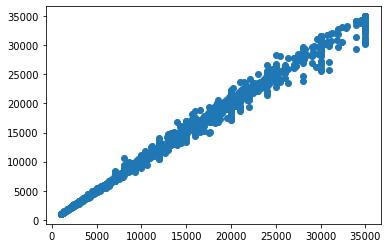

In [ ]:
plt.scatter(y_test,y_pred_3)

**Hyperparameter** Tuning for Random Forest Regression

In [ ]:
param_rfr = [{ 'n_estimators' : [2,10,20,50,100],
              'max_depth': np.arange(3, 10),
              'max_leaf_nodes':[1,10,25,50,100]}]

In [ ]:
rfr = RandomForestRegressor()
rfr_gs = GridSearchCV(rfr, param_rfr, cv=3, verbose=0).fit(X_train, y_train)

In [ ]:
rfr_gs_results = pd.DataFrame(rfr_gs.cv_results_)
rfr_gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004072,0.000782,0.000000,0.000000,3,1,2,"{'max_depth': 3, 'max_leaf_nodes': 1, 'n_estim...",NaN,NaN,NaN,NaN,NaN,175
1,0.006386,0.000294,0.000000,0.000000,3,1,10,"{'max_depth': 3, 'max_leaf_nodes': 1, 'n_estim...",NaN,NaN,NaN,NaN,NaN,147
2,0.009713,0.000102,0.000000,0.000000,3,1,20,"{'max_depth': 3, 'max_leaf_nodes': 1, 'n_estim...",NaN,NaN,NaN,NaN,NaN,146
3,0.019893,0.000604,0.000000,0.000000,3,1,50,"{'max_depth': 3, 'max_leaf_nodes': 1, 'n_estim...",NaN,NaN,NaN,NaN,NaN,145
4,0.036888,0.000881,0.000000,0.000000,3,1,100,"{'max_depth': 3, 'max_leaf_nodes': 1, 'n_estim...",NaN,NaN,NaN,NaN,NaN,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.031339,0.000138,0.002222,0.000050,9,100,2,"{'max_depth': 9, 'max_leaf_nodes': 100, 'n_est...",0.940974,0.936871,0.950710,0.942852,0.005804,66
171,0.149501,0.001383,0.003968,0.000101,9,100,10,"{'max_depth': 9, 'max_leaf_nodes': 100, 'n_est...",0.948783,0.952380,0.957709,0.952957,0.003667,18
172,0.296066,0.001028,0.005834,0.000039,9,100,20,"{'max_depth': 9, 'max_leaf_nodes': 100, 'n_est...",0.950743,0.953307,0.959825,0.954625,0.003823,8
173,0.736681,0.003504,0.011688,0.000192,9,100,50,"{'max_depth': 9, 'max_leaf_nodes': 100, 'n_est...",0.950773,0.954082,0.960762,0.955206,0.004155,4


In [ ]:
print("Best Params", rfr_gs.best_params_)
print("Best Score", rfr_gs.best_score_)

Best Params {'max_depth': 8, 'max_leaf_nodes': 100, 'n_estimators': 100}
Best Score 0.955507000505862


[link text](https://)Training and predicting the model using the Best parameters

In [ ]:
rfr_best = RandomForestRegressor(max_depth= 9, max_leaf_nodes= 100,n_estimators=100)
rfr_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=100,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_best_3 = rfr_best.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,y_pred_best_3))
print(np.sqrt(mean_squared_error(y_test,y_pred_best_3)))
print(explained_variance_score(y_test,y_pred_best_3))

888.368115295803
1663.6451239294984
0.9615132489616839


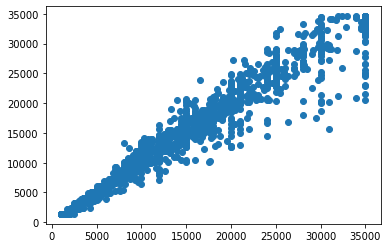

In [ ]:
plt.scatter(y_test,y_pred_best_3)

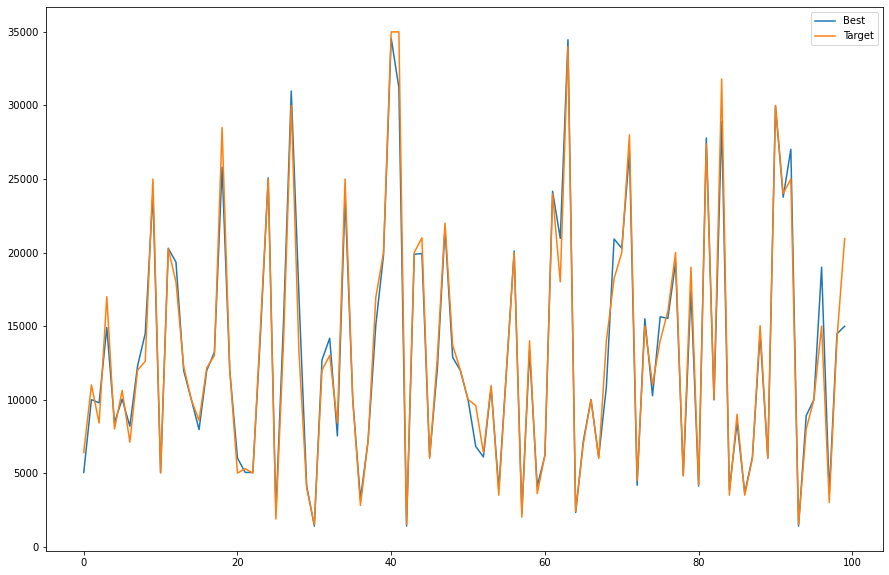

In [ ]:
rfr_table = pd.DataFrame({'Predict_values':y_pred_best_3,'Actual_values':y_test})
fig= plt.figure(figsize=(15,10))
predicting_vs_actual_rfr = rfr_table.reset_index()
predicting_vs_actual_rfr = predicting_vs_actual_rfr.drop(['index'],axis=1)
plt.plot(predicting_vs_actual_rfr[:100])
plt.legend(('Best', 'Target'))

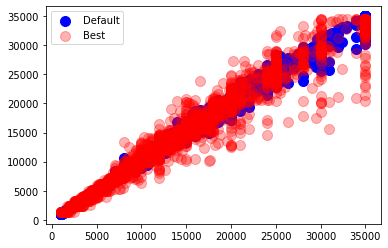

In [ ]:
# Comparison of Defualt vs Best Parameters Prediction values
plt.scatter(y_test,y_pred_3,s=100, color="blue", alpha=1)
plt.scatter(y_test,y_pred_best_3,s=100, color="red", alpha=0.3)
plt.legend(('Default','Best'))

Question & Answers: 

- Is the relationship significant?

  Answer : Yes, the relationship is significant

- Are any model assumptions violated?

  Answer : No

- Is there any multicollinearity in the model?
  
  Answer: Yes, there is multicollinearity in our model.

- In the multivariate models are predictor variables independent of all the other predictor variables?

  Answer: No, almost all our features are codependant on each other.

- In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

  Answer: The most significant variable is *installment*

- Does the model make sense?

  Answer: Yes, the model makes sense. Since it helps us predict the loan amount.

- Does regularization help?
  
  Answer: Yes, it helped us increase the explained_variance_score

- Which independent variables are significant?

  Answer: 'pub_rec' and '*delinq_2yrs'*

- Which hyperparameters are important?

  Answer: max_depth= 9, max_leaf_nodes= 100,n_estimators=100

### Prediction Test

In [ ]:
def prediction_print(x):
    print("Real Loan amount : " + str(y_test.iloc[x]))
    print("Predicted amount using Best Parameters Decision Tree Regression : " + str(y_pred_best_2[x]))
    print("Predicted amount using Best Parameters Random Forest Regression : " + str(y_pred_best_3[x]))

In [ ]:
prediction_print(10)

Real Loan amount : 5000
Predicted amount using Best Parameters Decision Tree Regression : 4872.7
Predicted amount using Best Parameters Random Forest Regression : 5043.592833954181


###Evaluation

We used three different metrics to evaluate our models; mean_squared_error,mean_absolute_error, and explained_variance_score.

- **mean_squared_error** : It tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.

- **mean_absolute_error** : It is a measure of errors between paired observations expressing the same phenomenon.

- **explained_variance_score** : It is used to measure the discrepancy between a model and actual data.

**Decision Tree Regression :** 

We tried training the model using default parameters which led to overfitting, where the explained_variance_score was 1. Later we tried tuning the hyperparameters and used GridSearch CV to get the best parameter combination that led to a better explained_variance_score of 0.94. Therefore, we were able to avoid overfitting.

Best parameter combination : <I>Best Params {'max_depth': 6, 'max_leaf_nodes': 100}</I>

**Random Forest Regression :** 

We tried training the model using default parameters which led to overfitting, where the explained_variance_score was 1. Later we tried tuning the hyperparameters and used GridSearch CV to get the best parameter combination that led to a better explained_variance_score of 0.95. Therefore, we were able to avoid overfitting.

Best parameter combination : <I>Best Params {'max_depth': 9, 'max_leaf_nodes': 100, 'n_estimators': 100}</I>

 
 


### Conclusion



We observed that Installment feature, is most important feature to predict the loan amount, It's possible to predict the loan amount that should be sanctioned to a individual based on his/her's previous loan repayment history. A


### License


Copyright 2020 Swin Sanjao Almeida

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.